### This notebook demonstrates of making API in Jupyter notebook using jupyter_kernel_gateway. The OCR task is taken for example.

In [1]:
import os
import cv2
import json
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Initialze the REQUEST so that error doesn't shows up while 
experimenting in the notebook.

In [2]:
REQUEST = '''{"body": {"image": "main.png"}}'''


In [3]:
def convert_image_text(image_path):
    '''
    Method to convert the image into text.
    '''
    
    # load the example image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
     
    # check to see if we should apply thresholding to preprocess the
    # image
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
    # write the grayscale image to disk as a temporary file so we can
    # apply OCR to it
    filename = "{}.png".format("temp")
    cv2.imwrite(filename, gray)
    
    # load the image as a PIL/Pillow image, apply OCR, and then delete
    # the temporary file
    text = pytesseract.image_to_string(Image.open(filename))
    os.remove(filename)
    
    return text

API to convert the image into text. 

Noisy image
to test
Tesseract OCR


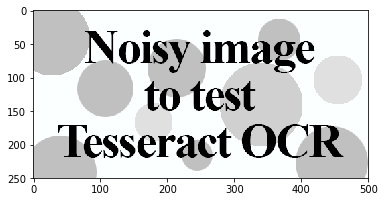

In [4]:
# POST /ocr
req = json.loads(REQUEST)
image_path = req['body']['image']
text = convert_image_text(image_path)
print(text)
plt.imshow(mpimg.imread(image_path))
